In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [2]:
final_df=pd.read_csv('D:\\Dipali\\Ineuron\\MLPro CCD\\notebooks\\data\\Final_df.csv')

In [3]:
final_df.head(2)

,Unnamed: 0,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,PAY_AMT_APR,default.payment.next.month,IsDefaulter,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single
0,0,20000.0,0,24,2,2,-1,-1,-2,-2,...,0.0,1,1,-2,3913.0,0,0,1,1,0
1,1,120000.0,0,26,-1,2,0,0,0,2,...,2000.0,1,1,3,10352.0,0,0,1,0,1


In [4]:
final_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
X = final_df.drop(['IsDefaulter', 'Payement_Value', 'Dues',], axis=1)
y = final_df['IsDefaulter']

In [8]:
categorical_cols=X.select_dtypes(include='object').columns

In [9]:
categorical_cols

Index([], dtype='object')

In [6]:
numerical_cols=X.select_dtypes(exclude='object').columns

In [7]:
numerical_cols

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'default.payment.next.month',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_single'],
      dtype='object')

In [11]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [13]:
num_pipeline=Pipeline(
    
    
    steps=[
        
        ('imputer',SimpleImputer()),
        ('scaler', StandardScaler())
    ]
    
    
)

In [55]:
'''cat_pipeline=Pipeline(
    
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))
    ]
    
)'''

"cat_pipeline=Pipeline(\n    \n    steps=[\n        ('imputer',SimpleImputer(strategy='most_frequent')),\n        ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))\n    ]\n    \n)"

In [14]:
preprocessor=ColumnTransformer(
    [
        
        ('num_pipeline',num_pipeline,numerical_cols)
        # ('cat_pipeline',cat_pipeline,categorical_cols)
    ]
)

In [28]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [29]:
X_train.head(2)

,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,...,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single
38944,380459.507195,1,43,0,0,0,0,0,0,328727.772504,...,9194.758288,9131.971509,8606.763587,7710.766714,1,0,0,1,1,0
17419,250000.000000,0,31,0,0,0,0,0,0,142905.000000,...,3010.000000,2205.000000,2045.000000,2200.000000,0,0,0,1,1,0


In [30]:
X_test.head()

,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,...,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single
15721,360000.0,1,45,1,-1,-1,-2,-2,-2,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0
13855,120000.0,0,37,0,0,0,0,0,0,78233.0,...,39000.0,2500.0,2400.0,2250.0,0,0,0,1,1,0
11355,180000.0,0,41,-1,-1,-1,-1,-2,-1,3600.0,...,0.0,0.0,7632.0,0.0,0,0,1,0,1,0
7005,100000.0,0,28,0,0,0,0,0,0,101557.0,...,2700.0,2500.0,2800.0,2600.0,0,0,0,1,0,1
13633,100000.0,0,33,0,0,2,0,0,0,90825.0,...,2951.0,2300.0,7174.0,2700.0,0,1,0,0,0,1


In [31]:
preprocessor.fit_transform(X_train)

array([[ 1.79525369,  1.0184838 ,  0.85012517, ...,  1.03913381,
         0.8975138 , -0.88294812],
       [ 0.75986941, -0.98185165, -0.50562901, ...,  1.03913381,
         0.8975138 , -0.88294812],
       [-0.43059685, -0.98185165, -0.61860853, ..., -0.96233997,
        -1.114189  ,  1.13256937],
       ...,
       [-0.01007416, -0.98185165, -0.95754707, ..., -0.96233997,
        -1.114189  ,  1.13256937],
       [-0.82741894,  1.0184838 ,  0.2852276 , ..., -0.96233997,
        -1.114189  ,  1.13256937],
       [-0.0688019 ,  1.0184838 , -0.50562901, ..., -0.96233997,
        -1.114189  ,  1.13256937]])

In [32]:
preprocessor.transform(X_test)

array([[ 1.63287801,  1.0184838 ,  1.07608421, ..., -0.96233997,
         0.8975138 , -0.88294812],
       [-0.27186802, -0.98185165,  0.17224808, ...,  1.03913381,
         0.8975138 , -0.88294812],
       [ 0.20431849, -0.98185165,  0.62416614, ..., -0.96233997,
         0.8975138 , -0.88294812],
       ...,
       [-0.35123244,  1.0184838 ,  2.09289985, ...,  1.03913381,
         0.8975138 , -0.88294812],
       [-0.11313918, -0.98185165, -1.07052659, ..., -0.96233997,
        -1.114189  ,  1.13256937],
       [-0.58932569, -0.98185165,  0.17224808, ...,  1.03913381,
         0.8975138 , -0.88294812]])

In [33]:
preprocessor.get_feature_names_out()

array(['num_pipeline__LIMIT_BAL', 'num_pipeline__SEX',
       'num_pipeline__AGE', 'num_pipeline__PAY_SEPT',
       'num_pipeline__PAY_AUG', 'num_pipeline__PAY_JUL',
       'num_pipeline__PAY_JUN', 'num_pipeline__PAY_MAY',
       'num_pipeline__PAY_APR', 'num_pipeline__BILL_AMT_SEPT',
       'num_pipeline__BILL_AMT_AUG', 'num_pipeline__BILL_AMT_JUL',
       'num_pipeline__BILL_AMT_JUN', 'num_pipeline__BILL_AMT_MAY',
       'num_pipeline__BILL_AMT_APR', 'num_pipeline__PAY_AMT_SEPT',
       'num_pipeline__PAY_AMT_AUG', 'num_pipeline__PAY_AMT_JUL',
       'num_pipeline__PAY_AMT_JUN', 'num_pipeline__PAY_AMT_MAY',
       'num_pipeline__PAY_AMT_APR',
       'num_pipeline__default.payment.next.month',
       'num_pipeline__EDUCATION_graduate school',
       'num_pipeline__EDUCATION_high school',
       'num_pipeline__EDUCATION_university',
       'num_pipeline__MARRIAGE_married', 'num_pipeline__MARRIAGE_single'],
      dtype=object)

In [34]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [35]:
#model Training
from sklearn.ensemble import RandomForestClassifier

In [37]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [56]:
def evaluate_model(y_true,predicted):
    """
    Evaluate a machine learning model.

    Parameters:
    - model: The trained machine learning model
    - X_test: Test features
    - y_true: True labels

    Returns:
    - accuracy: Accuracy score
    - precision: Precision score
    - recall: Recall score
    - f1: F1 score
    - confusion_mat: Confusion matrix
    - class_report: Classification report
    """
 
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    #class_report = classification_report(y_true,y_pred)

    return accuracy, precision, recall, f1, confusion_mat

In [57]:

# Make predictions
y_pred = model_rf.predict(X_test)

# Example usage:
# Assuming you have a trained model (e.g., a classifier) named 'trained_model'
# X_test is your test features and y_true is your true labels (ground truth)
# Make sure to replace 'trained_model', 'X_test', and 'y_true' with your actual data
accuracy, precision, recall, f1, confusion_mat = evaluate_model(y_test,y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)
#print("Classification Report:\n", class_report)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[7003    0]
 [   0 7016]]


In [ ]:
#We can see from above results that we are getting around 99% train accuracy and 
# 83% for test accuracy which depicts that model is overfitting  However our f1-score
# is around 82%, which is not bad.

In [60]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [61]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [62]:
grid_rf_clf.best_score_

1.0

In [63]:
grid_rf_clf.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [66]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [67]:
len(optimal_rf_clf.feature_importances_)

27

In [ ]:
#Impleteting XGBoost
"""Normally, you would encode them with ordinal or one-hot encoding, but XGBoost has the ability to internally deal with categoricals.

The way to enable this feature is to cast the categorical columns into Pandas category data type (by default, they are treated as text columns):"""

In [ ]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable

In [72]:
#import lightgbm and xgboost 
#import lightgbm as lgb 
import xgboost as xgb

In [73]:
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [76]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1,
            'objective':'binary:logistic','eval_metric':'auc',
            'learning_rate':.05}

In [77]:
#training our model 
num_round=10
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

In [78]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(microseconds=92962)

In [79]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [80]:
len(train_class_preds_probs)

32709

In [81]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [86]:
test_class_preds_probs[:10]

array([0.30072033, 0.30072033, 0.30072033, 0.30072033, 0.30072033,
       0.69927967, 0.69927967, 0.30072033, 0.30072033, 0.30072033],
      dtype=float32)

In [87]:
test_class_preds[:10]

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]

In [88]:
len(y_train)

32709

In [89]:
len(train_class_preds)

32709

In [90]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [91]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on train data is  1.0


In [ ]:
#Hyperparameter Tuning

In [92]:
from xgboost import  XGBClassifier

In [94]:
X = final_df.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = final_df['IsDefaulter']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [96]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=50,
                                                  max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=50, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [97]:
gsearch1.best_score_

1.0

In [98]:
optimal_xgb = gsearch1.best_estimator_

In [99]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [100]:
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [101]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on train data is  1.0


In [111]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
21,0.862974
4,0.041862
3,0.019856
25,0.017943
16,0.012012
1,0.011464
15,0.009860
6,0.006237
13,0.003947
7,0.002683


In [114]:
import matplotlib.pyplot as plt

NameError: name 'feature_importances_rf' is not defined

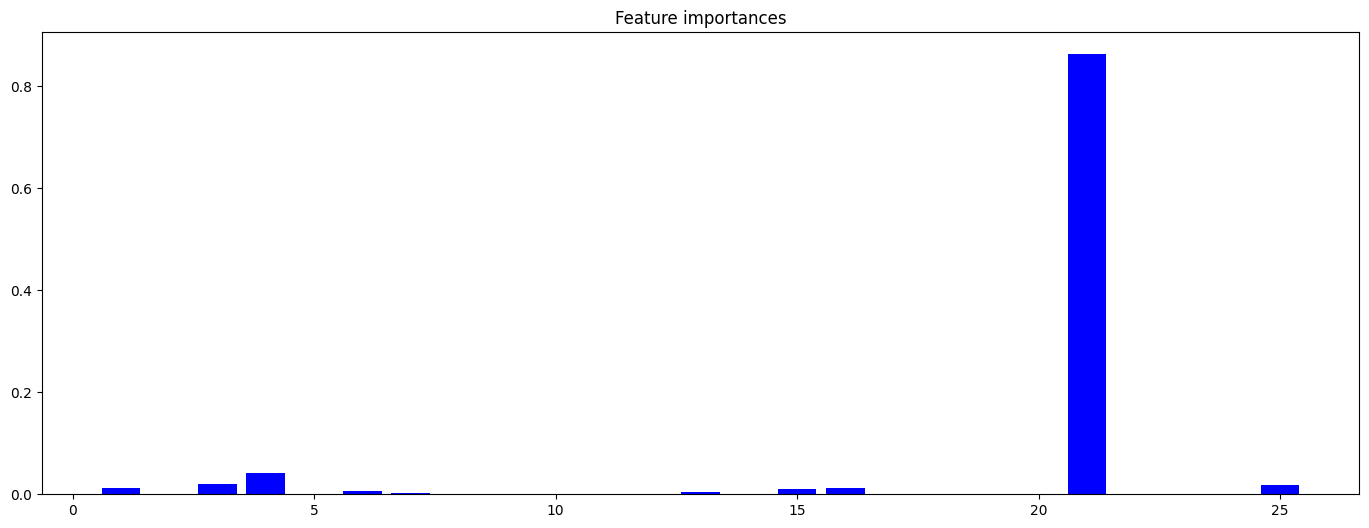

In [115]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [116]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

In [121]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [122]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

NameError: name 'metrics' is not defined

In [125]:
import torch

In [126]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"./{model_save_name}" 
torch.save(optimal_xgb, path)